# The Perceptron

The perceptron algorithm belongs to a set of what are known as **discriminative models**. These models construct a function $f: \mathbb{R}^n \to \{C_k\}_{k=1}^K$. Under this class of models, probabilities play no role. The purpose of these models, in a linear sense, is to find a hyperplane that best separates the data.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(2)

In [3]:
# generate data
means = [[2, 2], [4, 2]]
cov = [[.3, .2], [.2, .3]]
N = 10

X0 = np.random.multivariate_normal(means[0], cov, N).T
X1 = np.random.multivariate_normal(means[1], cov, N).T

X = np.concatenate([X0, X1], axis=1)
y = np.concatenate([np.ones((1, N)), -1*np.ones((1, N))], axis=1)

# add intercept
X = np.concatenate((np.ones((1, 2*N)), X), axis=0)

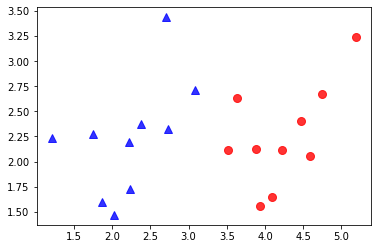

In [42]:
plt.plot(*X0, 'b^', markersize=8, alpha=.8)
plt.plot(*X1, 'ro', markersize=8, alpha=.8)
plt.show()

In [37]:
# return outcome of x given parameter w
def h(w, x):
    return np.sign(np.dot(w.T, x))


# Check if PLA is converge
def has_converged(X, y, w):
    return np.array_equal(h(w, X), y)


# Implementing PLA
def perceptron(X, y, w_init):
    w = [w_init]
    N = X.shape[1]
    mis_points = []

    # count = 0
    while True:
        # count += 1
        mix_id = np.random.permutation(N)
        for i in range(N):
            xi = X[:, mix_id[i]].reshape(3, 1)
            yi = y[0, mix_id[i]]
        
            if h(w[-1], xi) != yi:
                mis_points.append(mix_id[i])
                w_new = w[-1] + yi*xi
                
                w.append(w_new)

        if has_converged(X, y, w[-1]):
            break


    return w, mis_points


In [38]:
# Apply PLA
d = X.shape[0]
w_init = np.random.randn(d, 1)

(w, m) = perceptron(X, y, w_init)